У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data_path = '../M4/yulu_rental.csv'
df = pd.read_csv(data_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

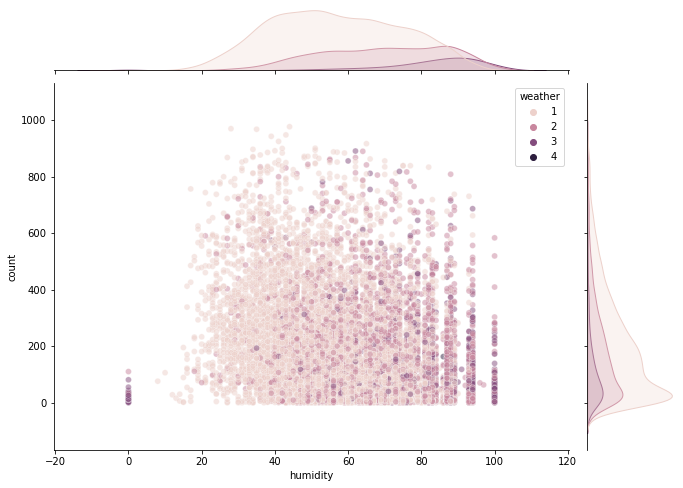

In [4]:
g = sns.jointplot(data=df, x='humidity', y='count', hue='weather', alpha=0.5)
g.figure.set_size_inches(10, 7);

Висновки:
1. З діаграми видно, що немає лінійної кореляції між вологістю повітря та к-стю користувачів. Тобто вологість повітря - не є фактором прямого впливу на попит послуги (аналогічне спостереження робили в попередньому домашньому завданні)
2. Найбільша кількість користувачів припадає на хорошу погоду - ясно, хмарно, туман. Візуально к-сть точок на час поганої погоди (дощ, злива, сніг тощо) мінімальна.
3. Найбільший попит на послугу (основна маса точок) спостерігається в хорошу погоду при вологості в інтервалі 40-80. При збільшенні вологості повітря від 80 к-сть користувачів зменшується і в більшості припадає на погану погоду (дощ, сніг відповідно).

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

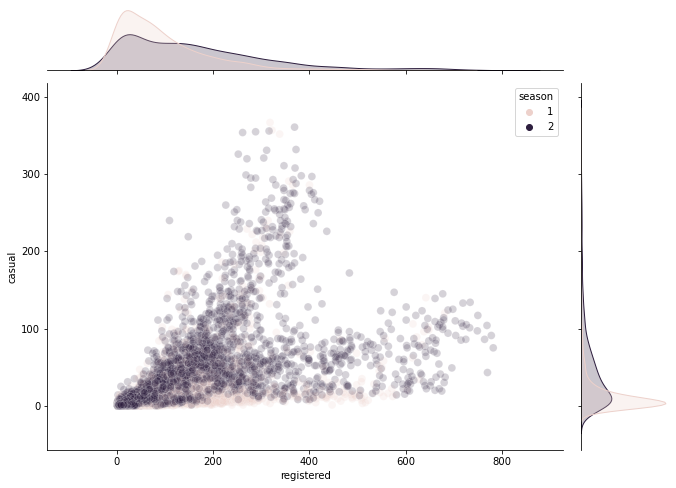

In [5]:
df_warm_weather = df[df.season <= 2]
g = sns.jointplot(data=df_warm_weather, x='registered', y='casual', hue='season', alpha=0.2, s=60)
g.figure.set_size_inches(10, 7);

Висновки:
1. З діаграми видно, що весною к-сть випадкових користувачів (casual) тримається на незначному рівні весь період. При цьому к-сть зареєстрованих користувачів коливається від 0 до 600 осіб. Можливо з покращанням погоди зареєстровані користувачі все більше повертаються до електровелосипедів і відповідно попит зростає.
2. Влітку є тренд, коли к-сть зареєстрованих зростає (коливається від 0 до 600), але при цьому к-сть звичайних користувачів тримається на рівні до 100 осіб. Можливо ця зона показує розподіл користування у будні дні, коли зареєстровані користувачі стабільно і масово користуються цим транспортом.
3. При цьому влітку є також зріз даних, коли є значне зростання звичайних користувачів при середньому рівні користуванні зареєстрованих. Можливо цей зріз даних припадає на вихідні та/ або свята, коли зареєстрованим користувачам не потрібно переміщатися з/ на роботу, але якраз випадкові користувачі мають потребу скористатися послугою. Для перевірки гіпотез п.2-3 вище потрібен подальший відповідний аналіз.
4. Візуально на даному графіку видно, що користувачів влітку більше ніж весною, тобто літо - це основний сезон електровелосипедів.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


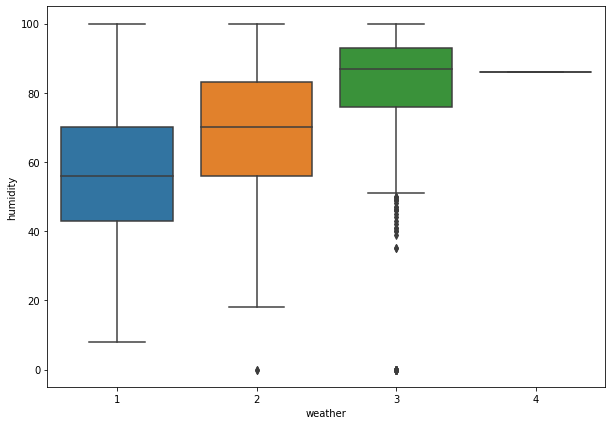

In [6]:
g = sns.boxplot(data=df, x='weather', y='humidity')
g.figure.set_size_inches(10, 7);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

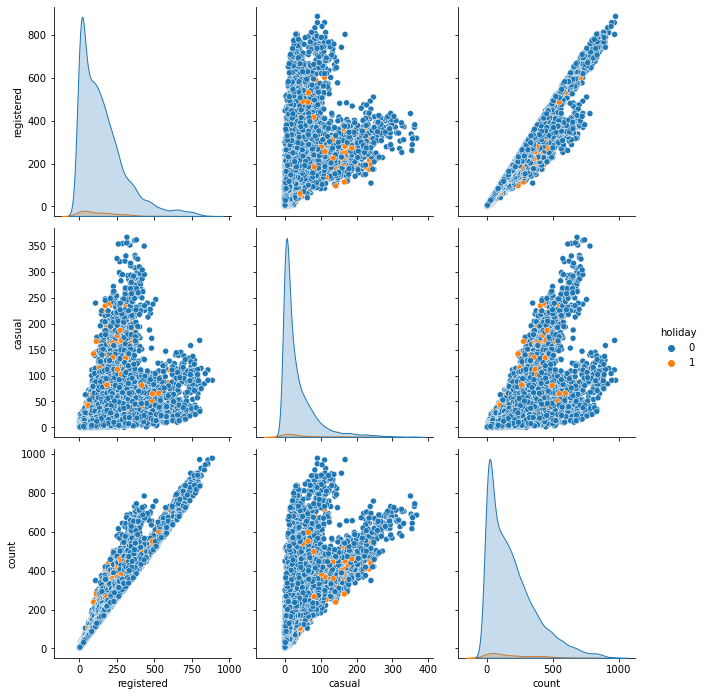

In [7]:
df_for_pairplot = df[['registered','casual','count','holiday']]
g = sns.pairplot(data=df_for_pairplot, hue='holiday')
g.figure.set_size_inches(10, 10);

Висновки:
1. Найбільше користуються електровелосипедами у не святкові дні. К-сть даних у святкові дні значно менша порівняно зі звичайними буднями.
2. З графіку взаємозв'язку між зареєстрованими та випадковими користувачами помітно, що у святкові дні є точки, коли зареєстрованих відносно не багато (до 250 осіб), при цьому к-сть випадкових користувачів зростає. На мою думку, це означає, що у святкові дні попит на електровелосипеди зростає саме у звичайних (випадкових) користувачів, у яких можливо ситуативно виникає потреба переміщатися/ гуляти по місту

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [8]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [9]:
df['date'] = df.datetime.dt.date

In [10]:
df_viz = df.groupby(['date'], as_index=False)[['registered', 'casual']].sum()
df_viz.head()

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82


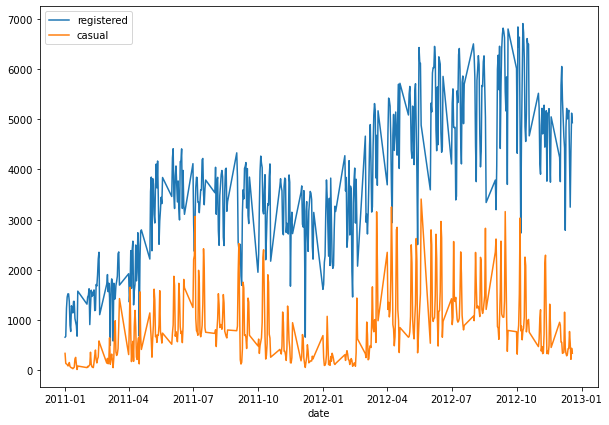

In [11]:
df_viz.plot(x='date', figsize=(10,7));

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
